<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

前5行数据:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       56

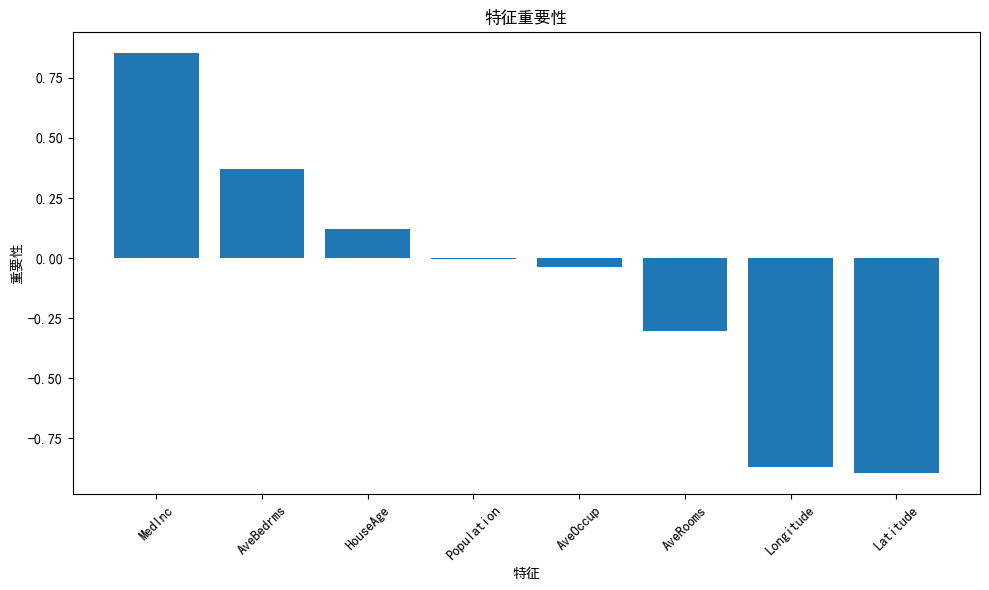

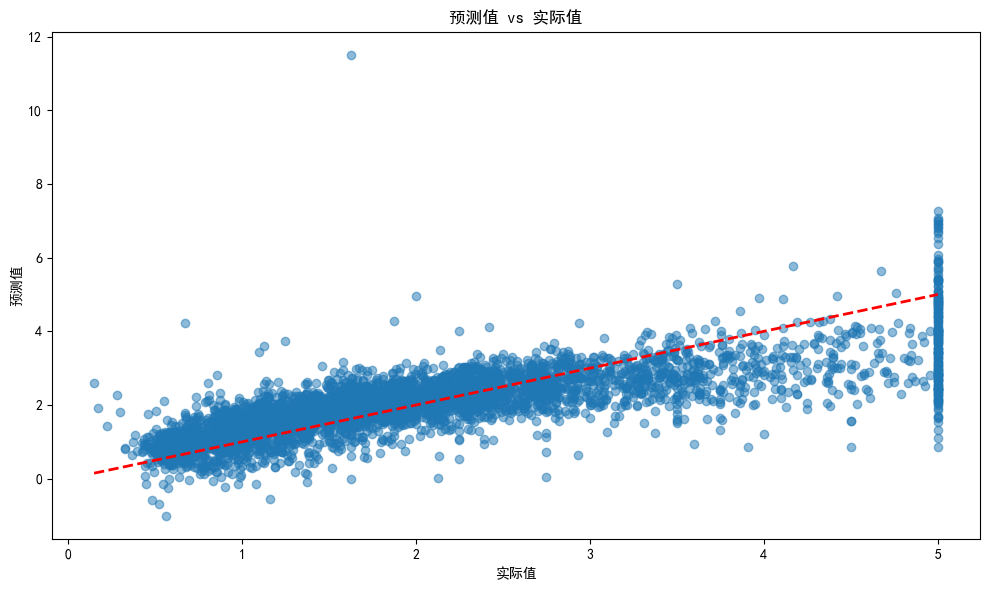

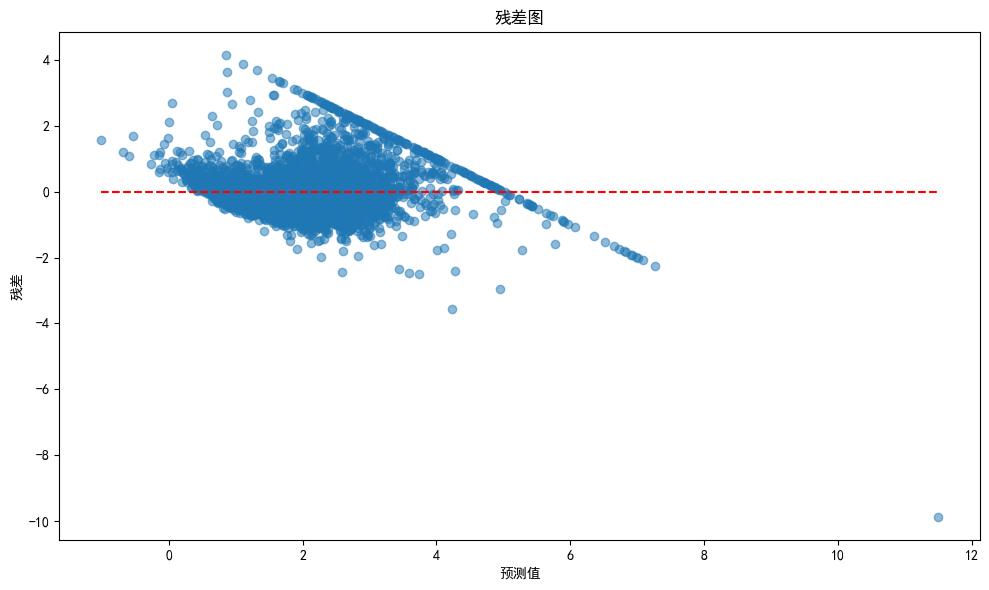

In [2]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

# 1. 数据加载
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='Price')

# 显示数据集的基本信息
print(X.info())
print("\n前5行数据:")
print(X.head())

# 2. 数据预处理
# 检查缺失值
print("\n缺失值统计:")
print(X.isnull().sum())

# 3. 特征工程
# 对所有特征进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 4. 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. 模型训练
model = LinearRegression()
model.fit(X_train, y_train)

# 6. 模型评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n模型评估结果:")
print(f"均方误差 (MSE): {mse:.2f}")
print(f"R2 分数: {r2:.2f}")

# 7. 特征重要性可视化
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('特征重要性')
plt.xlabel('特征')
plt.ylabel('重要性')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. 预测 vs 实际值可视化
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('预测值 vs 实际值')
plt.tight_layout()
plt.show()

# 9. 残差图
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.title('残差图')
plt.tight_layout()
plt.show()

In [ ]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# 设置样式
# plt.style.use('seaborn')
sns.set(font='SimHei')
sns.set_theme()  # 设置 Seaborn 主题
sns.set_palette("deep")

# 1. 数据加载和探索性数据分析
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

print("数据集形状:", X.shape)
print("\n特征描述统计:")
print(X.describe())

# 相关性热图
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('特征相关性热图')
plt.tight_layout()
plt.show()

# 2. 特征工程和选择
# 创建一个包含特征选择和PCA的管道
feature_selector = SelectKBest(f_classif, k=10)
pca = PCA(n_components=0.95)
scaler = StandardScaler()

# 3. 多个模型的比较
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# 4. 交叉验证
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('feature_selector', feature_selector),
        ('pca', pca),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"{name} 交叉验证平均准确率: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# 选择表现最好的模型（这里假设是随机森林）
best_model = RandomForestClassifier(random_state=42)

# 5. 超参数调优
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'feature_selector__k': [5, 10, 15]
}

pipeline = Pipeline([
    ('scaler', scaler),
    ('feature_selector', feature_selector),
    ('pca', pca),
    ('model', best_model)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("\n最佳参数:", grid_search.best_params_)
print("最佳交叉验证分数:", grid_search.best_score_)

# 使用最佳模型
best_pipeline = grid_search.best_estimator_

# 6. 特征重要性分析
feature_importance = best_pipeline.named_steps['model'].feature_importances_
feature_names = best_pipeline.named_steps['feature_selector'].get_feature_names_out()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('特征重要性')
plt.tight_layout()
plt.show()

# 7. 学习曲线分析
train_sizes, train_scores, test_scores = learning_curve(
    best_pipeline, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')
plt.title('学习曲线')
plt.xlabel('训练样本数')
plt.ylabel('准确率')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 最终模型评估
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)

print("\n分类报告:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵')
plt.tight_layout()
plt.show()